# Travail 1 - Kepler et Runge-Kutta 4

## Système Terre - Lune

Tout d'abord, importons les librairies utiles à notre travail.

In [162]:
import numpy
from math import log
from matplotlib import pyplot
%matplotlib inline

Ensuite, entrons les données caractéristiques du système. $T$ est la durée durant laquelle nous voulons simuler les trajectoires de la lune et de la Terre et $N$ est le paramètre qui définit le nombre de lignes des matrices de données de chaque astre.

In [163]:
T = 3600*24*27.3
dt = 100
N = 1+int(T/dt)

mT = 5.972*10**24
mL = 7.348*10**22
G = 6.67408*10**-11

Nous savons qu'une force gravitationnelle (force attractive) existe entre la Terre et la lune. Selon la loi de Newton, celle-ci s'écrit 

$${\bf F}_{L,T}=-{\bf F}_{T,L}=-\dfrac{Gm_T m_L{\bf r}}{r^3}$$

pour deux masses $m_L$ et $m_T$ s'attirent avec des forces mutuellement opposées séparées d'une distance $r$ qui est la norme du vecteur partant du centre de la Terre jusqu'au centre de la lune. Nous allons tout d'abord transformer l'équation de Newton, qui est du deuxième ordre, en un système de deux équations du premier ordre. Pour ce faire, nous introduisons le vectreur $u$ qui pourra être indicé par "T" ou "L" en fonction de l'astre dont nous calculons la trajectoire. $$
u_L  = \begin{pmatrix} x_L\ , y_L\ , v_{L,x}\ , v_{L,y}\end{pmatrix} \\
u_T  = \begin{pmatrix} x_T\ , y_T\ , v_{T,x}\ , v_{T,y}\end{pmatrix}\\
$$

Notre système d'équations différentielles devient

$$ (\dot{u}_T\ , \dot{u}_L) = f(u_T\ , u_L) = (f_T(u_T\ , u_L)\ , f_L(u_T\ , u_L)) $$ 

Nous obtenons donc

$$f_L(u_L)  = \begin{pmatrix} v_{L,x}\ , v_{L,y}\ , -\dfrac{ m_T\, G\, (x_L - x_T)}{ \left[(x_T- x_L)^2 + (y_T - y_L)^2\right]^{3/2}}\ , -\dfrac{ m_T\, G\, (y_L - y_T)}{ \left[(x_T- x_L)^2 + (y_T - y_L)^2\right]^{3/2}}  \end{pmatrix} \\
f_T(u_T)  = \begin{pmatrix} v_{T,x}\ , v_{T,y}\ , -\dfrac{ m_L\, G\, (x_T - x_L)}{ \left[(x_T- x_L)^2 + (y_T - y_L)^2\right]^{3/2}}\ , -\dfrac{ m_L\, G\, (y_L - y_T)}{ \left[(x_T- x_L)^2 + (y_T - y_L)^2\right]^{3/2}}  \end{pmatrix}$$

Encodons à présent les conditions initiales de la lune et de la Terre. Nous nommons $dataL$ et $dataT$ les matrices de données de la lune et de la Terre respectivement. Elles comporteront quatre colonnes. Par exemple, pour $dataL$, chaque ligne se présentera comme $ u_L = [x_L\ , y_L\ , v_{L,x}\ , v_{L,y}] $. Les lignes de $dataT$ suivent cette même structure. 

In [164]:
dataL = numpy.empty((N,4)) 
dataT = numpy.empty((N,4))

dataL0 = [-362600000,0,0,-1083.4]
dataT0 = [0,0,0,0]

dataL[0] = dataL0
dataT[0] = dataT0

### Runge-Kutta 4

Nous ne généraliserons pas la fonction $f$ à plus de deux corps, par soucis de lisibilité car cela n'est pas nécessaire.
La première ligne de $out$ est la trajectoire de la Terre, la seconde celle de la lune.

In [165]:
def f(uT,uL): 
    out = numpy.ones((2,4))  
    out[0] = numpy.array([uT[2],uT[3],-G*mL*(uT[0]-uL[0])/((uT[0]-uL[0])**2+(uT[1]-uL[1])**2)**(3/2),\
                          -G*mL*(uT[1]-uL[1])/((uT[0]-uL[0])**2+(uT[1]-uL[1])**2)**(3/2)])     
    out[1] = numpy.array([uL[2],uL[3],-G*mT*(uL[0]-uT[0])/((uT[0]-uL[0])**2+(uT[1]-uL[1])**2)**(3/2),\
                          -G*mT*(uL[1]-uT[1])/((uT[0]-uL[0])**2+(uT[1]-uL[1])**2)**(3/2)])

    return out

Ci-dessous la méthode "Runge-Kutta 4" appliquée directement aux trajectoires des deux astres. Nous traiterons simultanément les trajectoires de la lune et de la Terre.

In [166]:
def rk4(f,u,v,dt): 
    k1 = f(u,v)
    k2 = f(u+dt/2*k1[0,:],v+dt/2*k1[1,:])
    k3 = f(u+dt/2*k2[0,:],v+dt/2*k2[1,:])
    k4 = f(u+dt*k3[0,:],v+dt*k3[1,:])
    
    out = numpy.zeros((2,4))
    out[0] = u+dt/6*(k1[0,:]+2*k2[0,:]+2*k3[0,:]+k4[0,:])
    out[1] = v+dt/6*(k1[1,:]+2*k2[1,:]+2*k3[1,:]+k4[1,:])
    return out

On calcule maintenant la trajectoire. Notons que $dataL[t]$ est le vecteur $u_L$ au temps $t$ qui est l'input de $f$ (idem pour $dataT[t]$).

In [167]:
for t in range(1,N):
    
    W = rk4(f,dataT[t-1],dataL[t-1],dt)
    dataT[t] = W[0]
    dataL[t] = W[1]

posLT = dataL[:,0:2] - dataT[:,0:2] #position de la lune dans le repère de la Terre

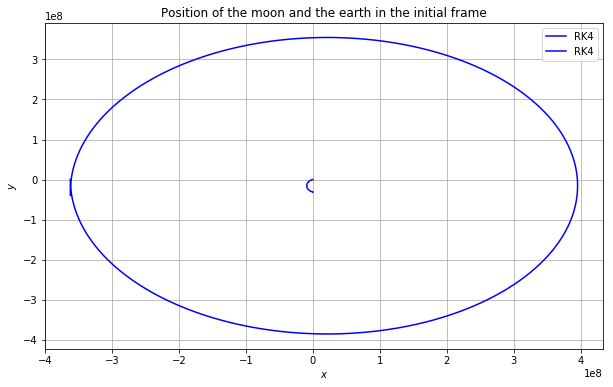

In [168]:
# Plot the position of the moon and the earth in the initial frame

pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(dataL[:,0],dataL[:,1], 'b-', label='RK4')
pyplot.plot(dataT[:,0],dataT[:,1], 'b-', label='RK4')
pyplot.title('Position of the moon and the earth in the initial frame')
pyplot.legend();
pyplot.show();

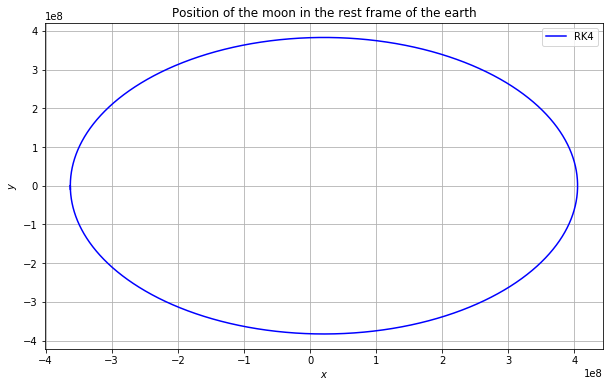

In [169]:
# Plot the position of the moon in the rest frame of the earth

pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(posLT[:,0],posLT[:,1], 'b-', label='RK4')
pyplot.title('Position of the moon in the rest frame of the earth')
pyplot.legend();
pyplot.show();

### Paramètres : grand et petit axes, excentricité et période

In [170]:
# Compute the parameters a,b,e

minX = 0
for i in range(1,N-1):
    if (posLT[i+1,0]>=posLT[i,0] and posLT[i,0]<posLT[i-1,0]):
        minX = posLT[i,0]
        break
        
maxX = 0
for i in range(1,N-1):
    if (posLT[i+1,0]<=posLT[i,0] and posLT[i,0]>posLT[i-1,0]):
        maxX = posLT[i,0]
        break

minY = 0
for i in range(1,N-1):
    if (posLT[i+1,1]>=posLT[i,1] and posLT[i,1]<posLT[i-1,1]):
        minY = posLT[i,1]
        break
        
maxY = 0
for i in range(1,N-1):
    if (posLT[i+1,1]<=posLT[i,1] and posLT[i,1]>posLT[i-1,1]):
        maxY = posLT[i,1]
        break
        
print("minX =", minX)
print("maxX =", maxX)
print("minY =", minY)
print("maxY =", maxY)
        
a = abs(maxX-minX)/2
b = abs(maxY-minY)/2
e = numpy.sqrt(1-b**2/a**2)

print("a =", a)
print("b =", b)
print("e =", e)

minX = -362599998.82
maxX = 404670942.482
minY = -383058329.509
maxY = 383058328.099
a = 383635470.651
b = 383058328.804
e = 0.0548319262482


In [171]:
# Compute the period

for i in range(2,N-1):
    if (posLT[i+1,0]>=posLT[i,0] and posLT[i,0]<posLT[i-1,0]):
        period = i*dt
        break
        
print("period in seconds =", period)
print("period in 24h-days =", period/24/3600)

period in seconds = 2350400
period in 24h-days = 27.203703703703702


Trouvons à présent l'apogée de l'orbite de la lune autour de la Terre.

In [172]:
for i in range(1,N-1):
    if (posLT[i+1,0]<=posLT[i,0] and posLT[i,0]>posLT[i-1,0]):
        indexApoL = i
        break

#nouvelles conditions initiales pour T, L
newInitL = dataL[indexApoL]
newInitT = dataT[indexApoL]

## Order of convergence

In [173]:
# plagiat ?

def get_diffgrid(data_current, data_fine, dt):
    
    N_current = len(data_current[:,0])
    N_fine = len(data_fine[:,0])
   
    grid_size_ratio = int(numpy.ceil(N_fine/N_current))
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            data_current[:,0]- data_fine[::grid_size_ratio,0])) 
    
    return diffgrid

In [174]:
# Show the order of the method

r = 2
h = 10

dt_values = numpy.array([h, r*h, r**2*h, r**3*h,r**4*h,r**5*h,r**6*h,r**7*h,r**8*h])

#dt_values = numpy.array([1000,300,100,30,10])  #,3,1
dataL_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N2 = int(T/dt)+1
        
    dataL = numpy.empty((N2, 4))
    dataT = numpy.empty((N2, 4))
    
    dataL[0] = dataL0
    dataT[0] = dataT0

    for t in range(1,N2):
        W = rk4(f, dataT[t-1], dataL[t-1], dt)
        dataT[t] = W[0]
        dataL[t] = W[1]
    
    dataL_values[i] = dataL

In [175]:
# Compute the differences

diffgridL = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    diffgridL[i] = get_diffgrid(dataL_values[i], dataL_values[0], dt)

In [176]:
print(diffgridL)

[0.0 48.864058298677264 56.449983477941714 61.072963862679899
 14.141684626229107 59.982822914607823 459.65624992735684
 7146.5193011984229 115359.62082497776]


In [177]:
alpha = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i in range(0, len(dt_values)-2):
    
    alpha[i] = (log(get_diffgrid(dataL_values[i+2], dataL_values[i+1], dt_values[i+2])) 
             - log(get_diffgrid(dataL_values[i+1], dataL_values[i], dt_values[i+1]))) / log(r)

print(alpha)

[-2.1341539783556143 3.148235537695043 -1.0272961557026385
 -0.044440627353790875 3.0915374366950132 4.0625613271827925
 4.016372956221617 None None]


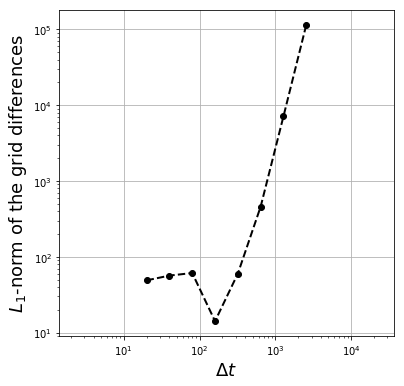

In [178]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta t$', fontsize=18)
pyplot.ylabel(r'$L_1$-norm of the grid differences', fontsize=18)
pyplot.xlim(1e-4,1)
pyplot.ylim(1e-4,1)
pyplot.axis('equal')
pyplot.loglog(dt_values[1:], diffgridL[1:], color='k', ls='--', lw=2, marker='o');

## Système Terre - Lune - astéroïde

A présent, la partie avec l'astéroïde. Il faut tout d'abord repéré le centre de l'ellipse parcourue par la lune autour de la Terre qui est dans son repère au repos.

In [179]:
# Find the ellipse LT's center
Xcenter = (maxX+minX)/2
Ycenter = (maxY+minY)/2

In [180]:
# NEW f ast

def f_ast(uT,uL,uA): 
    out = numpy.empty((3,4))  
    out[0] = numpy.array([uT[2],uT[3],-G*mL*(uT[0]-uL[0])/((uT[0]-uL[0])**2+(uT[1]-uL[1])**2)**(3/2),\
                          -G*mL*(uT[1]-uL[1])/((uT[0]-uL[0])**2+(uT[1]-uL[1])**2)**(3/2)])     
    out[1] = numpy.array([uL[2],uL[3],-G*mT*(uL[0]-uT[0])/((uT[0]-uL[0])**2+(uT[1]-uL[1])**2)**(3/2),\
                          -G*mT*(uL[1]-uT[1])/((uT[0]-uL[0])**2+(uT[1]-uL[1])**2)**(3/2)])
    out[2] = numpy.array([uA[2],uA[3],-G*mT*(uA[0]-uT[0])/((uT[0]-uA[0])**2+(uT[1]-uA[1])**2)**(3/2)\
                          -G*mL*(uA[0]-uL[0])/((uL[0]-uA[0])**2+(uL[1]-uA[1])**2)**(3/2),\
                          -G*mT*(uA[1]-uT[1])/((uT[0]-uA[0])**2+(uT[1]-uA[1])**2)**(3/2)\
                          -G*mL*(uA[1]-uL[1])/((uL[0]-uA[0])**2+(uL[1]-uA[1])**2)**(3/2)])
    return out

In [181]:
# NEW rk4 ast
def rk4_ast(f,u,v,w,dt): 
    k1 = f(u,v,w)
    k2 = f(u+dt/2*k1[0,:],v+dt/2*k1[1,:],w+dt/2*k1[2,:])
    k3 = f(u+dt/2*k2[0,:],v+dt/2*k2[1,:],w+dt/2*k2[2,:])
    k4 = f(u+dt*k3[0,:],v+dt*k3[1,:],w+dt*k3[2,:])
    
    out = numpy.empty((3,4))
    out[0] = u+dt/6*(k1[0,:]+2*k2[0,:]+2*k3[0,:]+k4[0,:])
    out[1] = v+dt/6*(k1[1,:]+2*k2[1,:]+2*k3[1,:]+k4[1,:])
    out[2] = w+dt/6*(k1[2,:]+2*k2[2,:]+2*k3[2,:]+k4[2,:])
    return out

Trouvons l'instant *t_apL* où la lune est à l'apogée de sa trajectoire autour de la Terre qui est dans son repère au repos. Nous avons positionné les axes de sorte que l'apogée se trouve sur l'axe des abscisses.

In [182]:
#NEW ast
T = 3600*24*3
dt = 100
N = 1+int(T/dt)

mT = 5.972*10**24
mL = 7.348*10**22
G = 6.67408*10**-11

dataL = numpy.empty((N,4)) 
dataT = dataL.copy()
dataA = dataL.copy()

dataL[0] = newInitL # conditions initiales
dataT[0] = newInitT
dataA[0] = [Xcenter, Ycenter,-3000,1500]

In [183]:
for t in range(1,N):
    W = rk4_ast(f_ast,dataT[t-1],dataL[t-1],dataA[t-1],dt)
    dataT[t] = W[0]
    dataL[t] = W[1]
    dataA[t] = W[2]
    
posLT = dataL[:,0:2] - dataT[:,0:2] #position de la lune dans le repère de la Terre
posAT = dataA[:,0:2] - dataT[:,0:2] #position de l'astéroïde dans le repère de la Terre

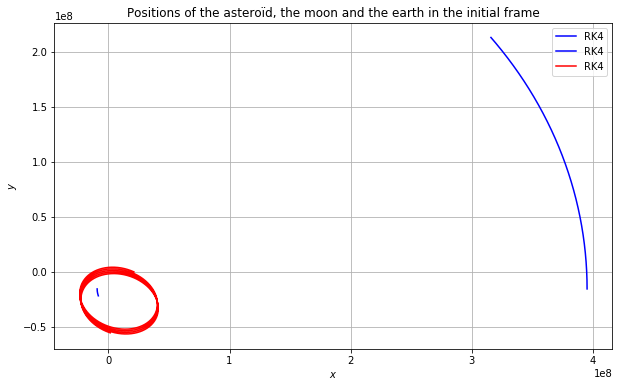

In [184]:
# Plot the position of the moon and the earth in the initial frame

pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(dataL[:,0],dataL[:,1], 'b-', label='RK4')
pyplot.plot(dataT[:,0],dataT[:,1], 'b-', label='RK4')
pyplot.plot(dataA[:,0],dataA[:,1], 'r-', label='RK4')
pyplot.title('Positions of the asteroïd, the moon and the earth in the initial frame')
pyplot.legend();
pyplot.show();

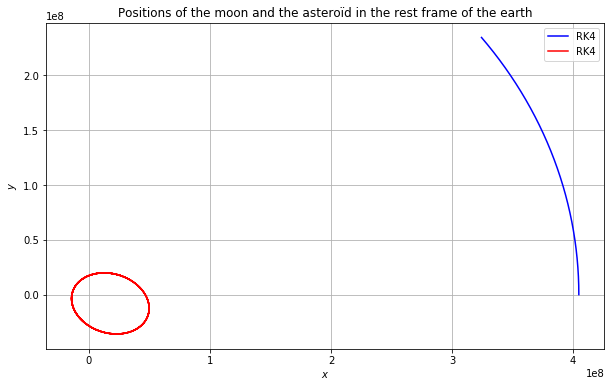

In [185]:
# Plot the position of the moon and the asteroïd in the rest frame of the earth

pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(posLT[:,0],posLT[:,1], 'b-', label='RK4')
pyplot.plot(posAT[:,0],posAT[:,1], 'r-', label='RK4')
pyplot.title('Positions of the moon and the asteroïd in the rest frame of the earth')
pyplot.legend();
pyplot.show();

In [186]:
dataL[:,0]

array([  3.95345121e+08,   3.95345112e+08,   3.95345079e+08, ...,
         3.16045940e+08,   3.15986493e+08,   3.15927026e+08])

### Animations des trajectoires

Traceback (most recent call last):
  File "/home/maxime/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 389, in process
    proxy(*args, **kwargs)
  File "/home/maxime/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/home/maxime/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1081, in _start
    self._init_draw()
  File "/home/maxime/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1792, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/home/maxime/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1814, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-187-af8e22965074>", line 5, in animate_LT
    x = numpy.linspace(0,100,len(data))
NameError: name 'data' is not defined


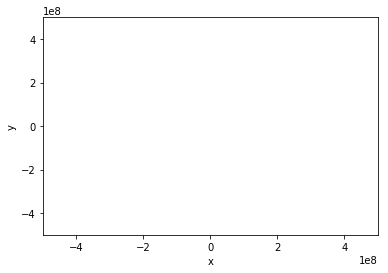

In [187]:
from matplotlib import animation
from IPython.display import HTML

def animate_LT(i):
    x = numpy.linspace(0,100,len(data))
    y = data
    line.set_dataL(x,y)
    return line,

fig = pyplot.figure()
ax = pyplot.axes(xlim=(-500000000,500000000),ylim=(-500000000,500000000),xlabel=('x'),ylabel=('y'))

line, = ax.plot([],[],color='#003366', lw=2)

anim = animation.FuncAnimation(fig, animate_LT,interval=1000,frames=period)
#HTML(anim.to_html5_video())
pyplot.show()

/home/maxime/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


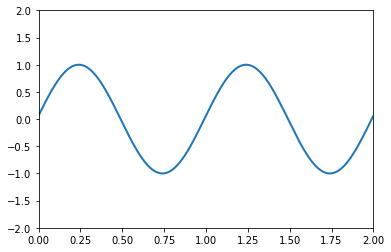

In [189]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()